
Κωδικές λέξεις: airplane.jpg
  Τιμή  14 -> 1111111111111110
  Τιμή  15 -> 1111111111111101
  Τιμή  17 -> 1111111111111100
  Τιμή  18 -> 11111111111101
  Τιμή  19 -> 1111111111101
  Τιμή  20 -> 11111111111000
  Τιμή  21 -> 111111111101
  Τιμή  22 -> 111111111001
  Τιμή  23 -> 111111111010
  Τιμή  24 -> 11111111011
  Τιμή  25 -> 11111111001
  Τιμή  26 -> 11111111010
  Τιμή  27 -> 11111100100
  Τιμή  28 -> 11111010001
  Τιμή  29 -> 11111011001
  Τιμή  30 -> 11111010100
  Τιμή  31 -> 1111100111
  Τιμή  32 -> 1111100010
  Τιμή  33 -> 1111100110
  Τιμή  34 -> 1111100101
  Τιμή  35 -> 11111010000
  Τιμή  36 -> 11111011000
  Τιμή  37 -> 1111101101
  Τιμή  38 -> 1111101001
  Τιμή  39 -> 1111110011
  Τιμή  40 -> 1111101111
  Τιμή  41 -> 11111100010
  Τιμή  42 -> 11111100000
  Τιμή  43 -> 11111101100
  Τιμή  44 -> 11111101101
  Τιμή  45 -> 11111101001
  Τιμή  46 -> 1111110101
  Τιμή  47 -> 11111110110
  Τιμή  48 -> 1111110111
  Τιμή  49 -> 11111110001
  Τιμή  50 -> 11111110111
  Τιμή  51 -> 1111

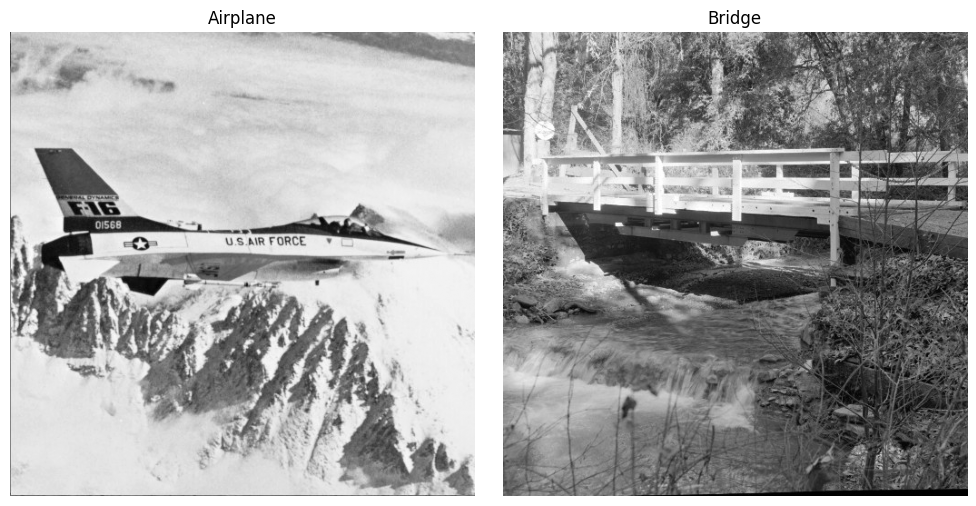


 Αρχείο: airplane.jpg
 Πλήθος μοναδικών τιμών: 220
 Μέσο μήκος κωδικής λέξης: 6.8201 bits
️ Λόγος συμπίεσης (Shannon-Fano): 1.17x
 Huffman ratio: 1.18x
 Εντροπία: 6.7274 bits

 Αρχείο: bridge.jpg
 Πλήθος μοναδικών τιμών: 256
 Μέσο μήκος κωδικής λέξης: 7.7804 bits
️ Λόγος συμπίεσης (Shannon-Fano): 1.03x
 Huffman ratio: 1.03x
 Εντροπία: 7.7249 bits


In [7]:
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt
import numpy as np
import huffman
from PIL import Image
import heapq
#  Υπολογισμός Συχνοτήτων
def calculate_frequencies(image):
    freq = defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    total = image.size
    prob = {k: v / total for k, v in freq.items()}
    return dict(sorted(prob.items(), key=lambda item: item[1], reverse=True))

#  Αναδρομική Συνάρτηση Shannon-Fano
def shannon_fano(symbols_probs):
    def build(symbols):
        if len(symbols) == 1:
            return {symbols[0][0]: ''}
        total = sum(p for _, p in symbols)
        acc = 0
        for i in range(len(symbols)):
            acc += symbols[i][1]
            if acc >= total / 2:
                break
        left = symbols[:i+1]
        right = symbols[i+1:]
        left_codes = build(left)
        right_codes = build(right)
        for k in left_codes:
            left_codes[k] = '0' + left_codes[k]
        for k in right_codes:
            right_codes[k] = '1' + right_codes[k]
        return {**left_codes, **right_codes}

    symbols = list(symbols_probs.items())
    return build(symbols)

#  Κωδικοποίηση Εικόνας
def encode_image(image, codebook):
    encoded = ''.join(codebook[pixel] for pixel in image.flatten())
    return encoded

#  Μέγεθος και Συμπίεση
def compute_compression(original_image, encoded_str):
    original_bits = original_image.size * 8  # 8 bits ανά pixel
    compressed_bits = len(encoded_str)
    compression_ratio = original_bits / compressed_bits
    return original_bits, compressed_bits, compression_ratio

# Εκτέλεση σε αρχείο
def process_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    freqs = calculate_frequencies(img)
    # Shannon-Fano
    codebook = shannon_fano(freqs)

    encoded = encode_image(img, codebook)
    original_bits, compressed_bits, ratio = compute_compression(img, encoded)

    avg_length = sum(freqs[symbol] * len(codebook[symbol]) for symbol in freqs)

    entropy = -sum(freqs[symbol] * np.log2(freqs[symbol]) for symbol in freqs)

    # Huffman
    symbols = list(freqs.keys())
    probs = list(freqs.values())

    huff_codebook = huffman.codebook(zip(symbols, probs))

    huff_encoded = encode_image(img, huff_codebook)
    _, huff_bits, huff_ratio = compute_compression(img, huff_encoded)

    print(f"\nΚωδικές λέξεις: {path}")
    for symbol, code in sorted(codebook.items()):
        print(f"  Τιμή {symbol:3} -> {code}")

    return img, codebook, encoded, ratio, avg_length, entropy, huff_ratio, freqs


img1, codebook1, encoded1, ratio1, avg_length1, entropy1, huff_ratio1, freqs1 = process_image("airplane.jpg")
img2, codebook2, encoded2, ratio2, avg_length2, entropy2, huff_ratio2, freqs2 = process_image("bridge.jpg")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Airplane")
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Bridge")
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


def print_results(path, freqs, ratio, avg_length, entropy, huff_ratio):
    print(f"\n Αρχείο: {path}")
    print(f" Πλήθος μοναδικών τιμών: {len(freqs)}")
    print(f" Μέσο μήκος κωδικής λέξης: {avg_length:.4f} bits")
    print(f"️ Λόγος συμπίεσης (Shannon-Fano): {ratio:.2f}x")
    print(f" Huffman ratio: {huff_ratio:.2f}x")
    print(f" Εντροπία: {entropy:.4f} bits")


print_results("airplane.jpg", freqs1, ratio1, avg_length1, entropy1, huff_ratio1)
print_results("bridge.jpg", freqs2, ratio2, avg_length2, entropy2, huff_ratio2)